In [214]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [215]:
os.listdir()

['.ipynb_checkpoints',
 '001 INTRO.ipynb',
 '002 - Preprocess.ipynb',
 '003.ipynb',
 '004.ipynb',
 'catboost_info',
 'final.csv',
 'grpd.csv',
 'merged.csv',
 'sample_submission_IIzFVsf.csv',
 'test.csv',
 'test_1eLl9Yf.csv',
 'train.csv',
 'train_fwYjLYX.csv']

In [216]:
train = pd.read_csv('train_fwYjLYX.csv')
train = train.groupby(['application_date','segment'] , as_index = False).sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 4 columns):
application_date    1650 non-null object
segment             1650 non-null int64
branch_id           1650 non-null float64
case_count          1650 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 64.5+ KB


In [217]:
train = train.drop('branch_id',axis =1 )
train.head()

,application_date,segment,case_count
0,2017-04-01,1,299.0
1,2017-04-01,2,897.0
2,2017-04-02,2,605.0
3,2017-04-03,1,42.0
4,2017-04-03,2,2016.0


In [226]:
test = pd.read_csv('test_1eLl9Yf.csv')
test


,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1
5,6,2019-07-11,1
6,7,2019-07-12,1
7,8,2019-07-13,1
8,9,2019-07-14,1
9,10,2019-07-15,1


In [219]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
Unnamed: 0          180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
day                 180 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


In [220]:
merged = train.append(test ,sort = True , ignore_index = True)
merged['day'] = merged.apply(lambda x : pd.to_datetime(x['application_date']).weekday() , axis = 1)


In [221]:
merged = merged.drop(['Unnamed: 0'] , axis = 1)
merged['y'] , merged['m'] , merged['d'] = merged['application_date'].str.split('-').str

In [222]:
merged = merged.set_index('application_date')
merged.head()

,case_count,day,segment,y,m,d
application_date,,,,,,
2017-04-01,299.0,5,1,2017,04,01
2017-04-01,897.0,5,2,2017,04,01
2017-04-02,605.0,6,2,2017,04,02
2017-04-03,42.0,0,1,2017,04,03
2017-04-03,2016.0,0,2,2017,04,03


In [223]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 2017-04-01 to 2019-10-24
Data columns (total 6 columns):
case_count    1650 non-null float64
day           1830 non-null int64
segment       1830 non-null int64
y             1830 non-null object
m             1830 non-null object
d             1830 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 100.1+ KB


In [224]:
merged.to_csv('final.csv')

In [211]:
merged['day'] = (merged.apply(lambda x : pd.to_datetime(x['application_date']).weekday() , axis = 1)).astype(int)
merged

KeyError: ('application_date', 'occurred at index 2017-04-01')

In [ ]:
os.listdir('./')

In [ ]:
test = pd.read_csv('./test.csv' , index_col = 'application_date')
test.info()

In [ ]:
train = pd.read_csv('./train.csv')#, index_col = 'application_date')

In [ ]:
train.info()

In [ ]:
train = train.drop('Unnamed: 0' ,axis = 1)

In [ ]:
train = train.groupby(['application_date' , 'segment'] , as_index =False).sum()

In [ ]:
train.head()

In [ ]:
merged = train.append(test)
merged = merged.reset_index()
merged.head()


In [212]:
merged['y'] , merged['m'] , merged['d'] = merged['application_date'].str.split('-').str

KeyError: 'application_date'

In [163]:
merged.info()
merged.to_csv('merged.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
index               1830 non-null object
Unnamed: 0          180 non-null float64
application_date    1650 non-null object
case_count          1650 non-null float64
day                 1830 non-null int64
segment             1830 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 85.9+ KB


In [99]:
# df['day'] = df['application_date'].dt.day

In [100]:
# df['month'] = df.index.month
# df['year'] = df.index.year

In [101]:
merged['y'] , merged['m'] , merged['d'] = merged['application_date'].str.split('-').str

In [102]:
merged.head()

,application_date,case_count,d,d_enc,day,day_enc,index,m,m_enc,segment,segment_enc,y,y_enc
0,2017-04-01,40.0,01,60.856080,5,187.348921,0,04,149.296243,1,32.707106,2017,129.512569
1,2017-04-03,5.0,03,79.142748,0,187.947250,1,04,149.296243,1,32.707106,2017,129.512569
2,2017-04-04,4.0,04,90.236623,1,197.249654,2,04,149.296243,1,32.707106,2017,129.512569
3,2017-04-05,113.0,05,80.985209,2,200.408382,3,04,149.296243,1,32.707106,2017,129.512569
4,2017-04-07,76.0,07,91.408289,4,195.889938,4,04,149.296243,1,32.707106,2017,129.512569


In [103]:
merged = merged.set_index(['application_date'])

In [104]:
def mean_encodings(df , cols) :
    for col in cols :
        df['{}_enc'.format(col)] = df.groupby(col)['case_count'].transform('mean')
        #df['{}_enc'.format(col)].fillna(0.4453, inplace=True)
    return df

cols = [ 'day' , 'segment' , 'd' , 'm' , 'y']


In [136]:
merged = mean_encodings(merged , cols)
merged.index.value_counts()

2018-01-25    83
2019-01-10    83
2017-08-18    83
2017-10-15    83
2019-02-11    83
2018-12-24    83
2019-04-04    83
2018-10-22    83
2017-04-19    83
2017-07-23    83
2019-03-09    83
2019-04-17    83
2018-11-12    83
2017-08-23    83
2017-07-12    83
2019-02-27    83
2019-02-21    83
2019-03-22    83
2018-01-17    83
2018-07-19    83
2018-10-16    83
2017-04-26    83
2018-01-28    83
2017-06-26    83
2018-06-30    83
2017-12-09    83
2019-05-12    83
2017-04-30    83
2018-12-19    83
2018-05-23    83
              ..
2017-06-03    83
2019-05-07    83
2017-06-08    83
2018-11-20    83
2017-11-01    83
2018-03-10    83
2018-05-21    83
2019-05-24    83
2018-12-04    83
2018-04-14    83
2019-03-02    83
2018-02-21    83
2019-06-26    83
2017-08-10    83
2018-08-24    83
2017-04-07    83
2018-03-22    83
2018-01-12    83
2019-03-06    83
2019-01-31    83
2017-11-21    83
2017-05-13    83
2018-04-27    83
2019-05-03    83
2019-05-16    83
2019-07-06     2
2019-07-08     2
2019-07-10    

In [114]:
merged.to_csv('merged.csv')

In [106]:
df = merged[merged.index  < '2019-04-01'].dropna()

In [107]:
val = merged[(merged.index  >= '2019-04-01') & (merged.index  >= '2019-07-05')].dropna()


In [108]:
test = merged[(merged.index  >= '2019-07-05')]

In [130]:
##########
%matplotlib notebook  

merged = merged[merged['segment'] == 1]

In [133]:
merged['2017-09-09']

KeyError: '2017-09-09'

In [124]:
X_train = df.drop(['case_count'] , axis = 1)
y_train = df['case_count'].astype(int)

X_val = val.drop(['case_count'] , axis = 1)
y_val = val['case_count'].astype(int)


<IPython.core.display.Javascript object>


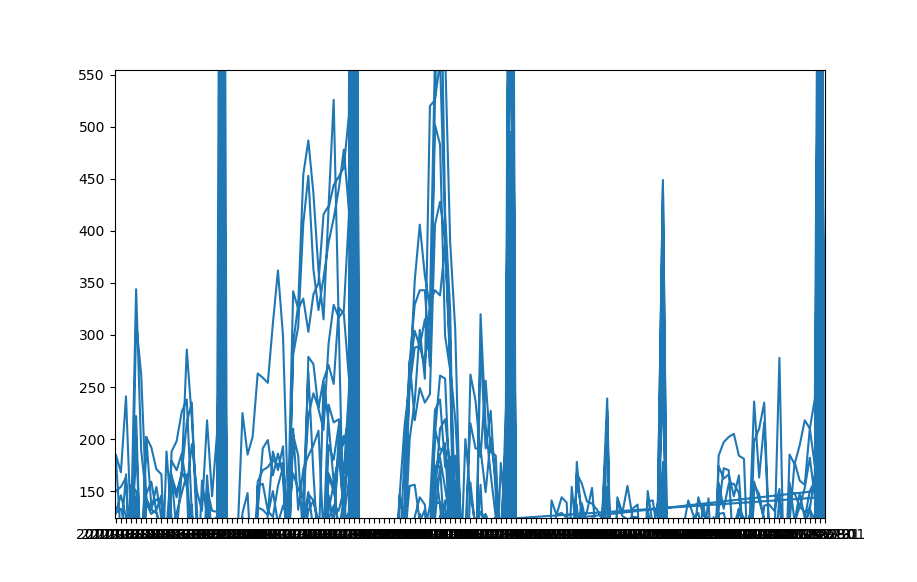

In [125]:
plt.plot(X_train.index , y_train)


In [110]:
categorical = ['m' , 'd' , 'day' ,'y' , 'segment']

def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]
categorical_features_indices = column_index(X_train, categorical)

In [111]:
#train.describe()
from catboost import CatBoostRegressor


In [112]:
model =  CatBoostRegressor(iterations=1500,
                             learning_rate=0.001,
                             depth=16,
                             eval_metric='MAPE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             task_type = "GPU",
                             devices='0:1',
                             
                             od_wait=100)

In [113]:
model.fit(X_train, y_train,
                 eval_set=(X_val, y_val),
                  cat_features=categorical_features_indices,
                 use_best_model=True)

0:	learn: 63.2023226	test: 56.5607235	best: 56.5607235 (0)	total: 1.47s	remaining: 36m 48s
50:	learn: 60.9346764	test: 55.2134710	best: 55.2134710 (50)	total: 1m 15s	remaining: 35m 49s
100:	learn: 58.7698520	test: 53.8259094	best: 53.8259094 (100)	total: 2m 29s	remaining: 34m 36s
150:	learn: 56.7063872	test: 52.5344093	best: 52.5344093 (150)	total: 3m 44s	remaining: 33m 25s
200:	learn: 54.7248548	test: 51.3003674	best: 51.3003674 (200)	total: 4m 59s	remaining: 32m 17s
250:	learn: 52.8405219	test: 50.0777919	best: 50.0777919 (250)	total: 6m 14s	remaining: 31m 5s
300:	learn: 51.0270642	test: 48.9158491	best: 48.9158491 (300)	total: 7m 30s	remaining: 29m 52s
350:	learn: 49.3085469	test: 47.8547269	best: 47.8547269 (350)	total: 8m 44s	remaining: 28m 37s
400:	learn: 47.6744087	test: 46.7968750	best: 46.7968750 (400)	total: 9m 59s	remaining: 27m 23s


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (58930,) and (70610,)

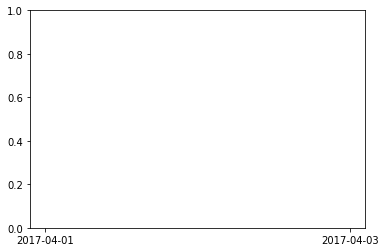